In [ ]:
# Import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os
from scipy.signal import spectrogram
import seaborn as sns
import glob

In [10]:
# Load audio file
path = os.path.join(os.getcwd(), "data")
wav_files = glob.glob(os.path.join(path, "*.wav"))
path = os.path.join(os.getcwd(), "data")
file_path = wav_files[0]
y, sr = librosa.load(file_path, sr=None)
print(f"Audio duration: {librosa.get_duration(y=y, sr=sr):.2f} seconds")
print(f"Sample rate: {sr} Hz")

Audio duration: 60.03 seconds
Sample rate: 16000 Hz


In [12]:
# Normalize amplitude
y = y / np.max(np.abs(y))

In [13]:
# Detect non-silent segments
non_silent_intervals = librosa.effects.split(y, top_db=20)
y_trimmed = np.concatenate([y[start:end] for start, end in non_silent_intervals])

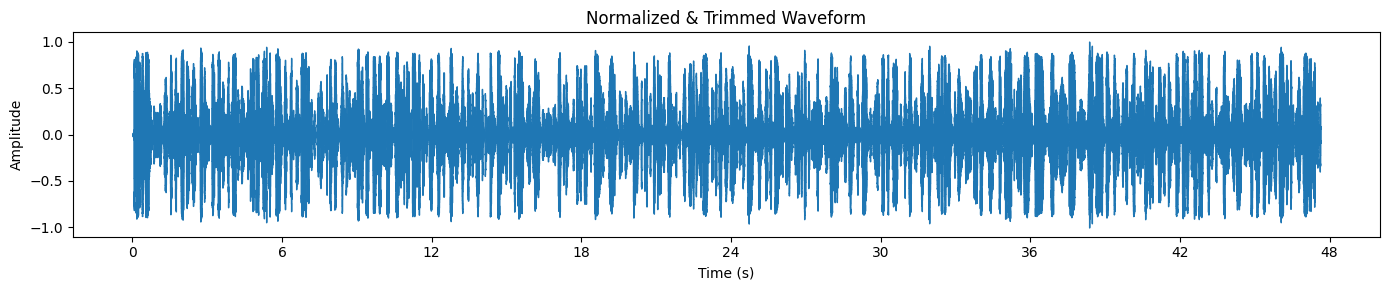

In [14]:
# Plot waveform
plt.figure(figsize=(14, 3))
librosa.display.waveshow(y_trimmed, sr=sr)
plt.title("Normalized & Trimmed Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

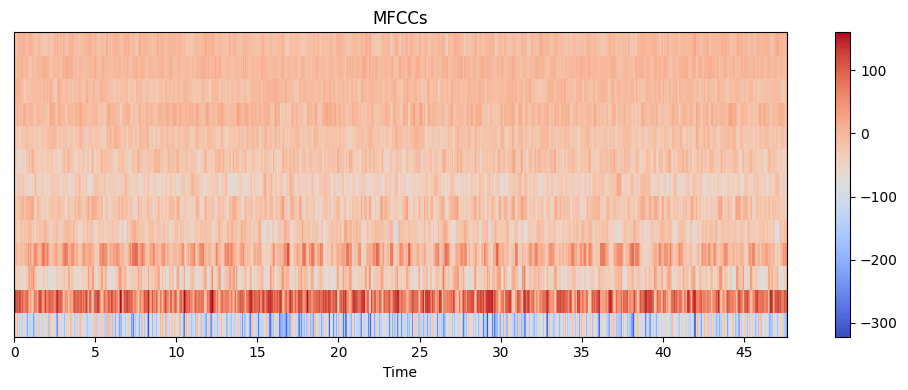

In [15]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y_trimmed, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title("MFCCs")
plt.tight_layout()
plt.show()

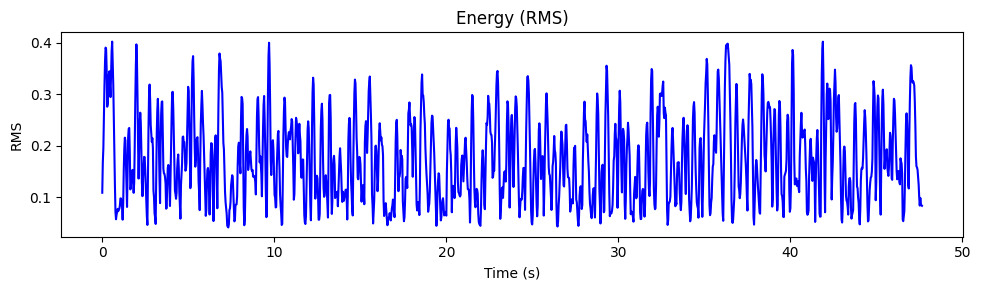

In [16]:
# Extract energy (RMS)
rms = librosa.feature.rms(y=y_trimmed)[0]
frames = range(len(rms))
t = librosa.frames_to_time(frames, sr=sr)
plt.figure(figsize=(10, 3))
plt.plot(t, rms, color='b')
plt.title("Energy (RMS)")
plt.xlabel("Time (s)")
plt.ylabel("RMS")
plt.tight_layout()
plt.show()

In [17]:
# Extract pitch using librosa's piptrack
pitches, magnitudes = librosa.piptrack(y=y_trimmed, sr=sr)
pitch_track = []

for i in range(pitches.shape[1]):
    index = magnitudes[:, i].argmax()
    pitch = pitches[index, i]
    pitch_track.append(pitch if pitch > 0 else np.nan)

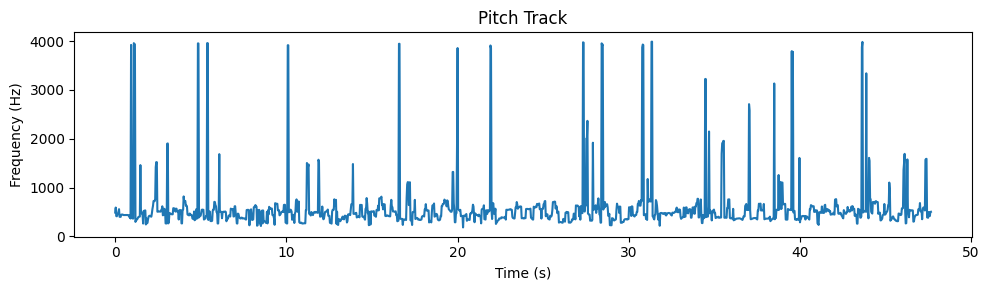

In [18]:
plt.figure(figsize=(10, 3))
plt.plot(librosa.frames_to_time(range(len(pitch_track)), sr=sr), pitch_track)
plt.title("Pitch Track")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.tight_layout()
plt.show()